In [19]:
import pandas as pd
import numpy as np #linear algebra library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
df = pd.read_csv("realest.csv") 
df.head() # display first 5 rows of the dataset, make sure everything went through correctly

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [20]:
df.isnull().sum() # check for null values, sckit-learn does not accept null directly 

Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64

In [21]:
df.dropna(inplace = True)
df.isnull().sum()

Price        0
Bedroom      0
Space        0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64

In [22]:
df.corr() # check which features have the largest effect on price  



,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
Price,1.000000,0.321623,0.739074,0.578310,0.467262,0.505958,0.567729,0.555242,0.137773
Bedroom,0.321623,1.000000,0.581410,0.841807,0.357425,0.045922,0.621555,0.189651,-0.116611
Space,0.739074,0.581410,1.000000,0.761927,0.422497,0.609800,0.598866,0.407141,0.079876
Room,0.578310,0.841807,0.761927,1.000000,0.499721,0.142749,0.767886,0.285706,0.039036
Lot,0.467262,0.357425,0.422497,0.499721,1.000000,0.202397,0.421500,0.154071,-0.037464
Tax,0.505958,0.045922,0.609800,0.142749,0.202397,1.000000,0.018013,0.420709,-0.133850
Bathroom,0.567729,0.621555,0.598866,0.767886,0.421500,0.018013,1.000000,0.269352,-0.005469
Garage,0.555242,0.189651,0.407141,0.285706,0.154071,0.420709,0.269352,1.000000,0.125645
Condition,0.137773,-0.116611,0.079876,0.039036,-0.037464,-0.133850,-0.005469,0.125645,1.000000


In [23]:
#space is the strongest predictor, so it'll be used as the sole predictor
X = df[['Space']] # features 
y = df[['Price']] # target class 

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42) # 80/20 train test split



In [24]:
lr = LinearRegression()
lr.fit(Xtrain, ytrain) 

LinearRegression()

In [25]:
ypred=lr.predict(Xtest)
ypred

array([[46.29945009],
       [57.3757779 ],
       [48.56999858],
       [79.80484812],
       [77.67250694],
       [53.07160774],
       [55.26318062],
       [49.08333997],
       [57.19808281],
       [57.02038771],
       [58.0865583 ],
       [51.70927865],
       [51.47235185],
       [56.54653411],
       [63.04227716],
       [54.80907093],
       [50.32720566],
       [51.57107135],
       [46.53637689],
       [50.16925446],
       [50.68259586],
       [51.84748595],
       [79.78510422],
       [55.42113182],
       [56.68474141],
       [55.61857082]])

In [26]:
r_squared=r2_score(ytest,ypred)
r_squared

0.6064694687371468

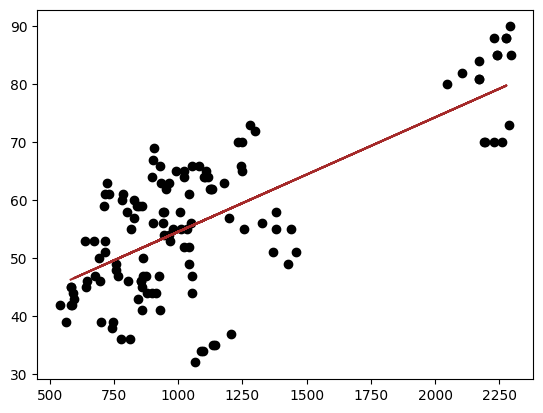

In [27]:
plt.scatter(df['Space'],df['Price'],color='Black')
plt.plot(Xtest,ypred,color='Brown')
plt.show()